In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Statistics_Dataset/homepage_actions.csv')
df.head(10)

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view
6,2016-09-24 20:39:03.248853,522116,experiment,view
7,2016-09-24 20:57:20.336757,349125,experiment,view
8,2016-09-24 20:58:01.948663,349125,experiment,click
9,2016-09-24 21:00:12.278374,560027,control,view


In [3]:
control_df = df.query("group == 'control'")

In [4]:
control_ctr = control_df.query("action == 'click'").id.nunique() / control_df.query("action == 'view'").id.nunique()

In [5]:
control_ctr

0.2797118847539016

In [6]:
experiment_df = df.query("group == 'experiment'")

In [7]:
experiment_ctr = experiment_df.query("action == 'click'").id.nunique() / experiment_df.query("action == 'view'").id.nunique()

In [8]:
experiment_ctr

0.3097463284379172

In [9]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [10]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query("group == 'control'")
    experiment_df = b_samp.query("group == 'experiment'")
    control_ctr = control_df.query("action == 'click'").id.nunique() / control_df.query("action == 'view'").id.nunique()
    experiment_ctr = experiment_df.query("action == 'click'").id.nunique() / experiment_df.query("action == 'view'").id.nunique()
    diffs.append(experiment_ctr - control_ctr)

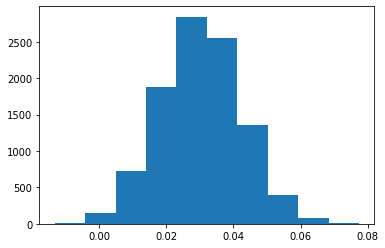

In [11]:
plt.hist(diffs);

In [12]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

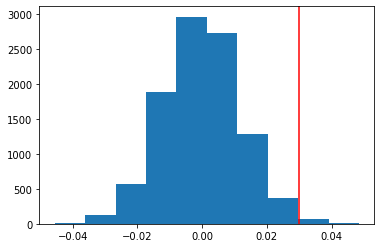

In [15]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color='r');

In [16]:
(null_vals > obs_diff).mean()

0.0063

**Reject Null Hypothesis as p-value is less than 0.01**